# Importing necessary libraries

In [1]:
# Filtering out warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
prevData=pd.read_csv("previous_application.csv")
appData=pd.read_csv("application_data.csv")

In [4]:
prevData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [5]:
appData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# Description of Datasets
Dataset 'prevData' contains information about the client’s previous loan data.
It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

Dataset 'appData' ontains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

# Clean the data

### Identify nulls or missing values, drop columns

In [6]:
#Listing columns having more than 30% null values in prevData
emptycol1=prevData.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [7]:
#Drop columns having more than 30% null values in prevData
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
prevData.drop(labels=emptycol1,axis=1,inplace=True)
prevData.shape

(1670214, 22)

In [8]:
#Listing columns having more than 30% null values in appData
emptycol2=appData.isnull().sum()
emptycol2=emptycol2[emptycol2.values>(0.3*len(emptycol2))]
len(emptycol2)

64

In [9]:
#Drop columns having more than 30% null values in appData
emptycol2 = list(emptycol2[emptycol2.values>=0.3].index)
appData.drop(labels=emptycol2,axis=1,inplace=True)
appData.shape

(307511, 58)

### Drop unwanted columns

In [10]:
#Drop unwanted columns in prevData
unwanted1=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
           'DAYS_DECISION']
prevData.drop(labels=unwanted1,axis=1,inplace=True)

In [11]:
#Drop unwanted columns in appData
unwanted2=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
appData.drop(labels=unwanted2,axis=1,inplace=True)

# Description of cleaned data

In [12]:
prevData.describe()

SK_ID_PREV    SK_ID_CURR  AMT_APPLICATION    AMT_CREDIT  \
count  1.670214e+06  1.670214e+06     1.670214e+06  1.670213e+06   
mean   1.923089e+06  2.783572e+05     1.752339e+05  1.961140e+05   
std    5.325980e+05  1.028148e+05     2.927798e+05  3.185746e+05   
min    1.000001e+06  1.000010e+05     0.000000e+00  0.000000e+00   
25%    1.461857e+06  1.893290e+05     1.872000e+04  2.416050e+04   
50%    1.923110e+06  2.787145e+05     7.104600e+04  8.054100e+04   
75%    2.384280e+06  3.675140e+05     1.803600e+05  2.164185e+05   
max    2.845382e+06  4.562550e+05     6.905160e+06  6.905160e+06   

       SELLERPLACE_AREA  
count      1.670214e+06  
mean       3.139511e+02  
std        7.127443e+03  
min       -1.000000e+00  
25%       -1.000000e+00  
50%        3.000000e+00  
75%        8.200000e+01  
max        4.000000e+06

In [13]:
prevData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_APPLICATION         1670214 non-null  float64
 4   AMT_CREDIT              1670213 non-null  float64
 5   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 6   NAME_CONTRACT_STATUS    1670214 non-null  object 
 7   NAME_PAYMENT_TYPE       1670214 non-null  object 
 8   CODE_REJECT_REASON      1670214 non-null  object 
 9   NAME_CLIENT_TYPE        1670214 non-null  object 
 10  NAME_GOODS_CATEGORY     1670214 non-null  object 
 11  NAME_PORTFOLIO          1670214 non-null  object 
 12  NAME_PRODUCT_TYPE       1670214 non-null  object 
 13  CHANNEL_TYPE            1670214 non-null  object 
 14  SE

In [14]:
appData.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count  3.075110e+05  307499.000000               307511.000000  307511.000000   
mean   5.990260e+05   27108.573909                    0.020868  -16036.995067   
std    4.024908e+05   14493.737315                    0.013831    4363.988632   
min    4.500000e+04    1615.500000                    0.000290  -25229.000000   
25%    2.700000e+05   16524.000000                    0.010006  -19682.000000   
50%    5.135310e+05   24903.000000                    0.018850  -15750.000000   
75%    8.086500e+05   34596.000000                    0.028663  -12413.000000   
max    4.050000e+06  258025.500000                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000      307511.000000    307511.000000   
mean    63815.045904       -4986.120328     -2994.202373   
std    141275.766519        3522.886321      1509.450419   
min    -17912.000000      -24672.000000     -7197.000000   
25%     -2760.000000       -7479.500000     -4299.000000   
50%     -1213.000000       -4504.000000     -3254.000000   
75%      -289.000000       -2010.000000     -1720.000000   
max    365243.000000           0.000000         0.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
count           307511.000000           307511.000000            307511.000000  
mean                 0.078173                0.230454                 0.179555  
std                  0.268444                0.421124                 0.383817  
min                  0.000000                0.000000                 0.000000  
25%                  0.000000                0.000000                 0.000000  
50%                  0.000000                0.000000                 0.000000  
75%                  0.000000                0.000000                 0.000000  
max                  1.000000                1.000000                 1.000000

In [15]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

# Preparing data for analysis

#### Creating bins for variables

In [16]:
# Creating bins for income amount

income_bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
income_slots = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

appData['AMT_INCOME_RANGE']=pd.cut(appData['AMT_INCOME_TOTAL'],bins=income_bins,labels=income_slots)

In [17]:
# Creating bins for Credit amount

credit_bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
credit_slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

appData['AMT_CREDIT_RANGE']=pd.cut(appData['AMT_CREDIT'],bins=credit_bins,labels=credit_slots)

In [18]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=appData.loc[appData["TARGET"]==0]
target1_df=appData.loc[appData["TARGET"]==1]

In [19]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

11.39

## Understanding Previous applicants data

#### Study Credit amount granted by the company compared to Loan contract type

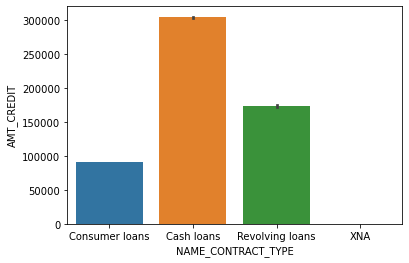

In [20]:
#Basic trend on Credit Amount based on Contract type
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=prevData)

Inferences:
- The Credit amount is highest for the 'Cash Loan' applications, followed by 'Revolving loans' and 'Consumer loans'.
- Cash loan applications seem to be the target application to get a higher Credit amount.

#### Study Contract status compared to the Credit Amount

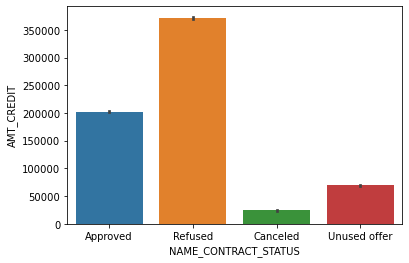

In [21]:
#Basic trend on Credit Amount based on Contract type
sns.barplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=prevData)

- The loan applications with 'Credit amount' greater than 350,000 are Refused mostly.
- The loan applications with 'Credit amount' upto 200,000 are Approved mostly.

#### Study the relationship between Contract Type and Contract status based on Application amount

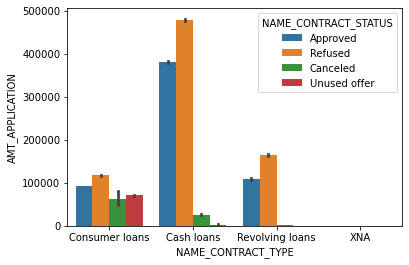

In [22]:
#Study relationship between the Contract type, Contract Status and Application Amount.
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_APPLICATION', hue='NAME_CONTRACT_STATUS', data=prevData)

#### Inferences:
- Highest application amounts have been received for 'Cash Loans'.
- Cash Loans applied for 400K-500k are mostly rejected.

#### Study the trends of Rejection reasons of a loan application with Contract Type

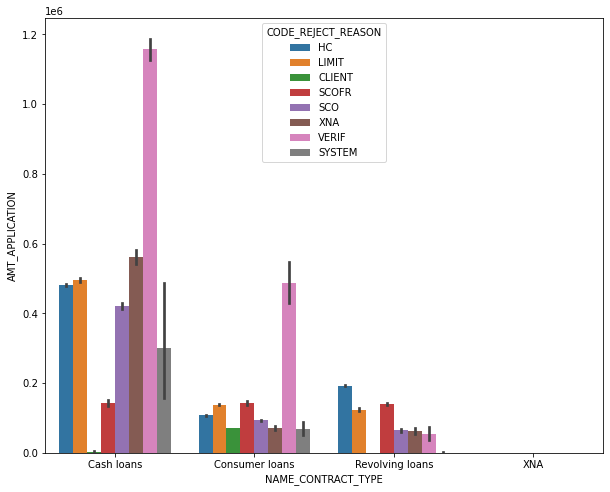

In [24]:
prevData1=prevData[(prevData['CODE_REJECT_REASON'] != 'XAP')]
plt.figure(figsize=(10,8))
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_APPLICATION', hue='CODE_REJECT_REASON', data=prevData1)

### Inferences
- Most Cash loans and Consumer loans are rejected due to Verification issues (VERIF).
- 'HC' and 'LIMIT' are the next most popular reasons for a loan not being approved.

# Analyzing Current Application data

In [25]:
# Creating a function to use for Logarithmic scale plots

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

#### Distribution of Income range

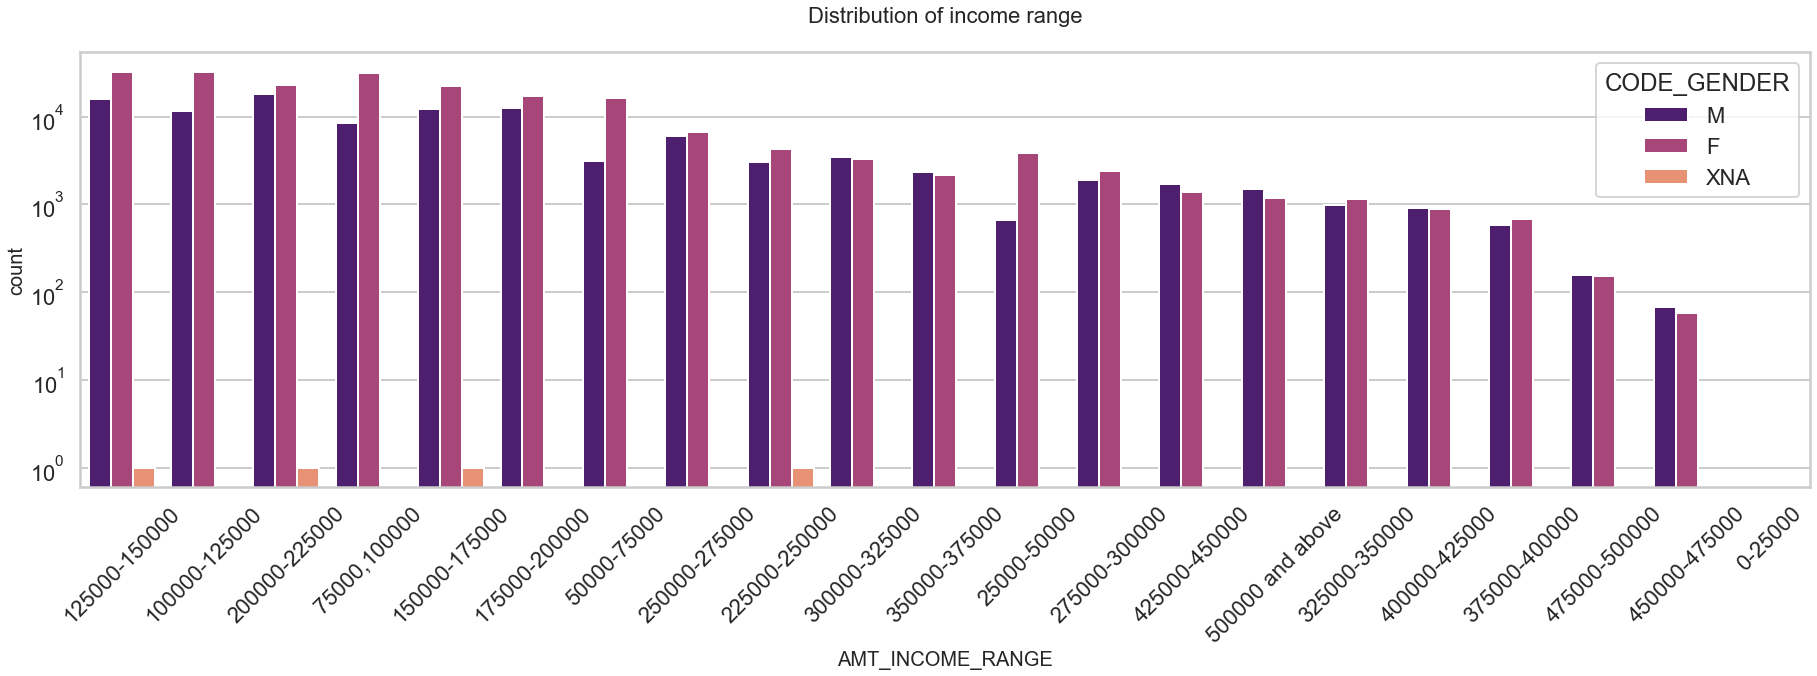

In [26]:
# PLotting for income range
uniplot(appData,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

#### Inferences
1. There are more Women having  an income range between 75,000 - 2,25,000.
2. Majority of the customers fall under an Income range of 100000 to 225000.
3. There are very few customers having income above 400000 comparitive to the other income ranges.

#### Distribution of Income type

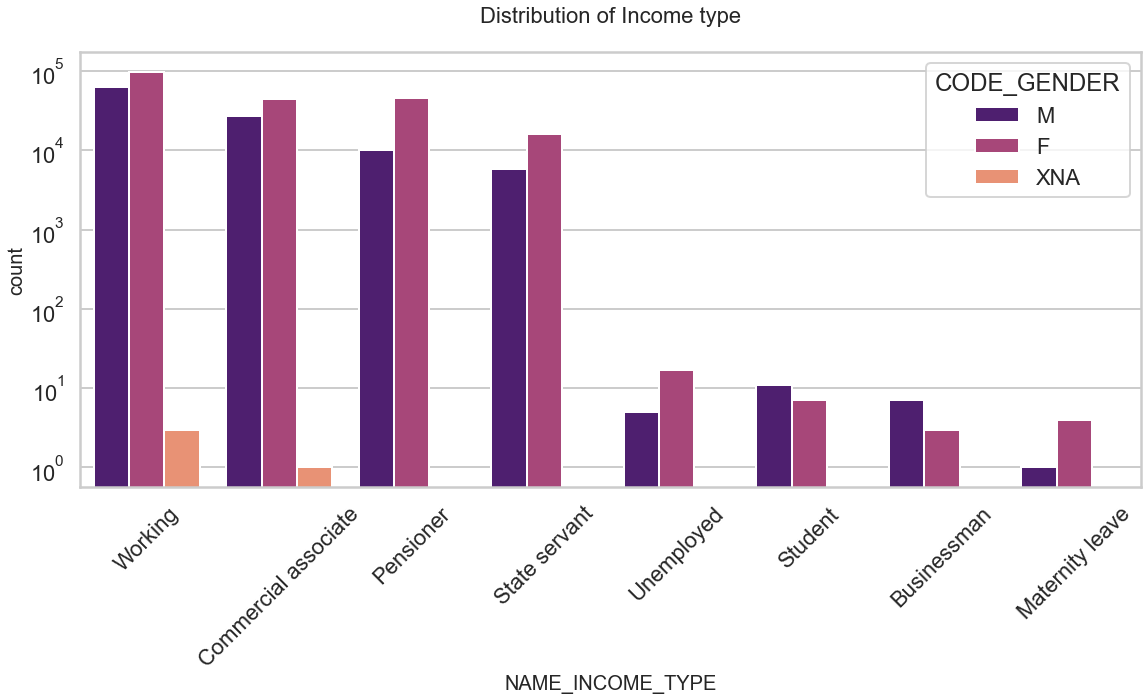

In [27]:
# Plotting for Income type

uniplot(appData,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Inferences
1. Majority of the customers applying for loan are either 'Working', 'Commercial associate', 'Pensioners' or 'State Servant'. So customers from these categories can be considered as the highest priority targets for the company.
2. In all of the above categories, there are slightly more women than men.
3. Very few customers from the 'Unemployed', 'Student', 'Businessman', 'Maternity leave' categories are applying for a loan. So it can be assumed that these people are the last priority targets.

#### Distribution of Organization Type for current applicants

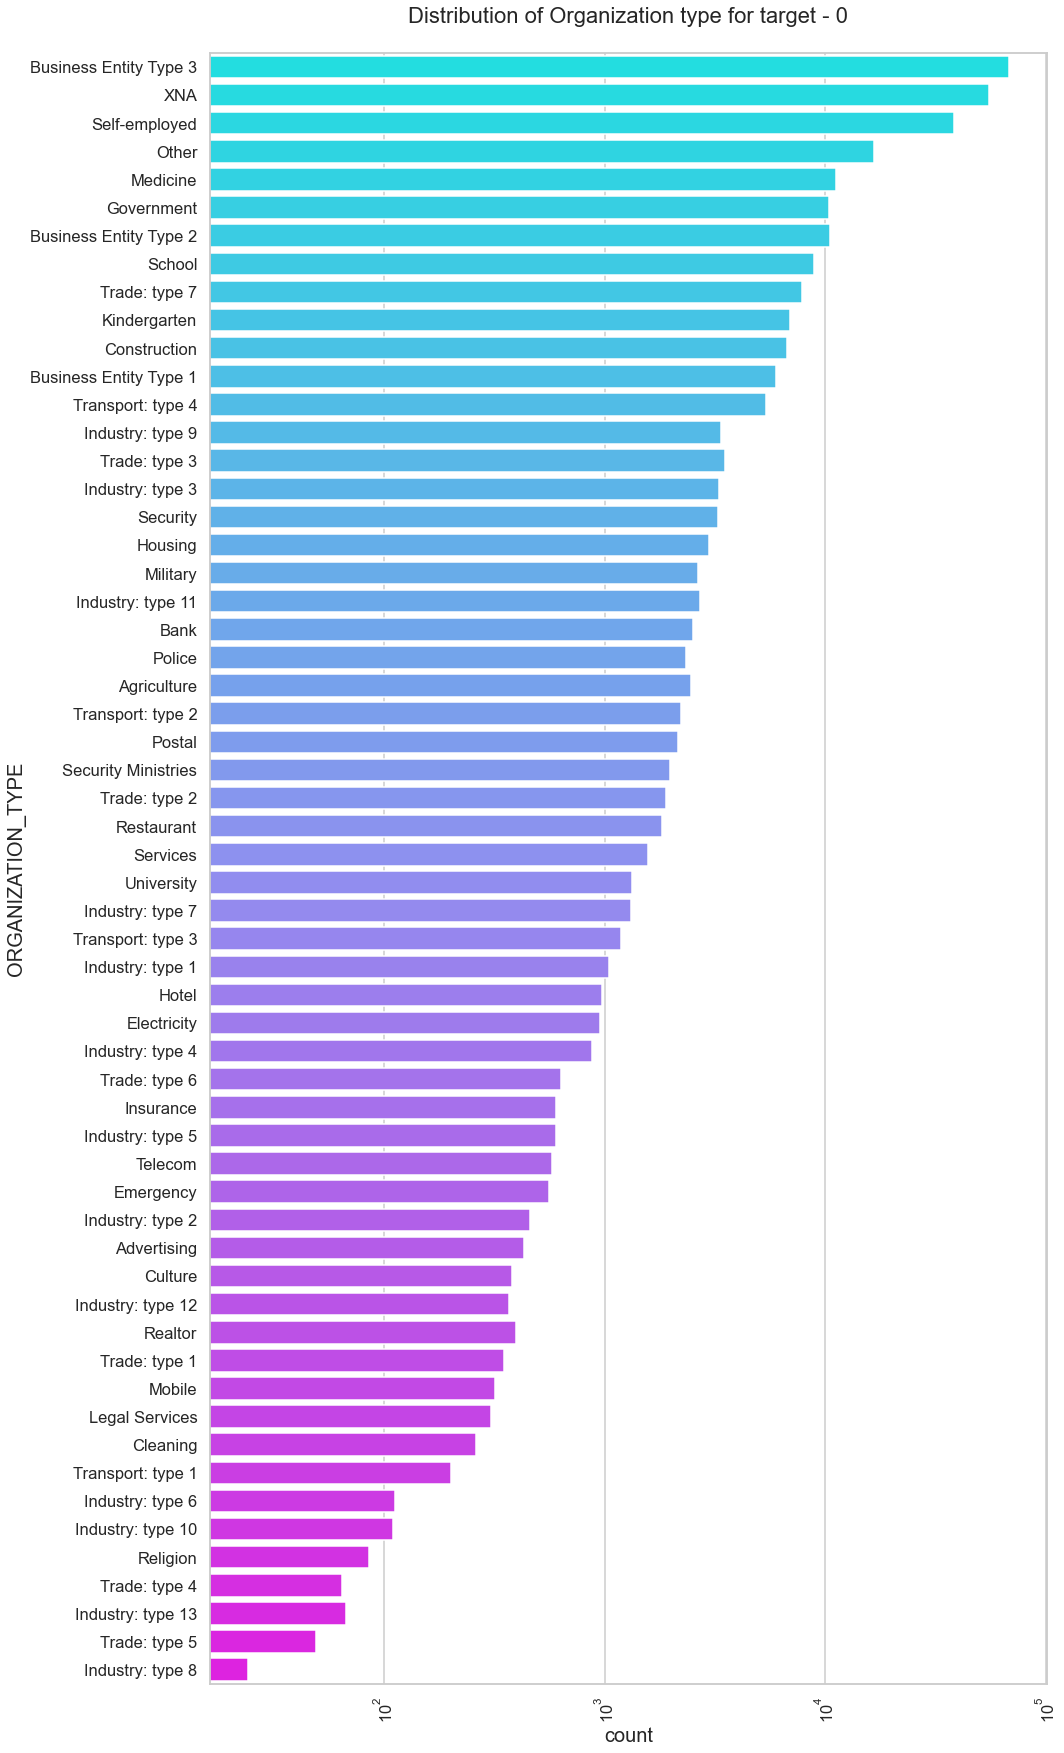

In [28]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=appData,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

#### Inferences
1. Majority of the Customers who have applied for loans work for the organization types ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ or ‘Government’. 
2. Very few customers belong to Industry type 8,type 6, type 10, religion and trade type 5, type 4.

#### Distribution of Income type among the customers having difficulty in paying the installments

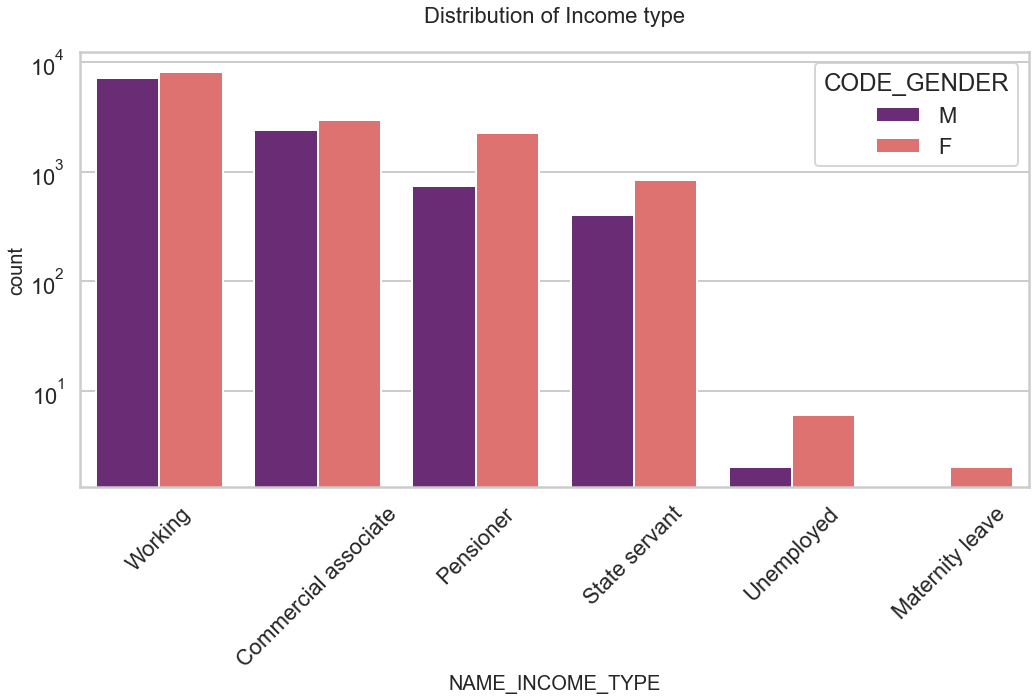

In [29]:
# Plotting for Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Inferences
1. Majority of the customers that have difficulties in paying installments belong to income types ‘working’, ’commercial associate’, and ‘State Servant’. These are also the categories having majority of customers.
2. Very few customers with income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ have difficulty in paying installments. These are also the categories having least number of customers.

#### Distribution of Organization Type among customers having difficulties in paying installments

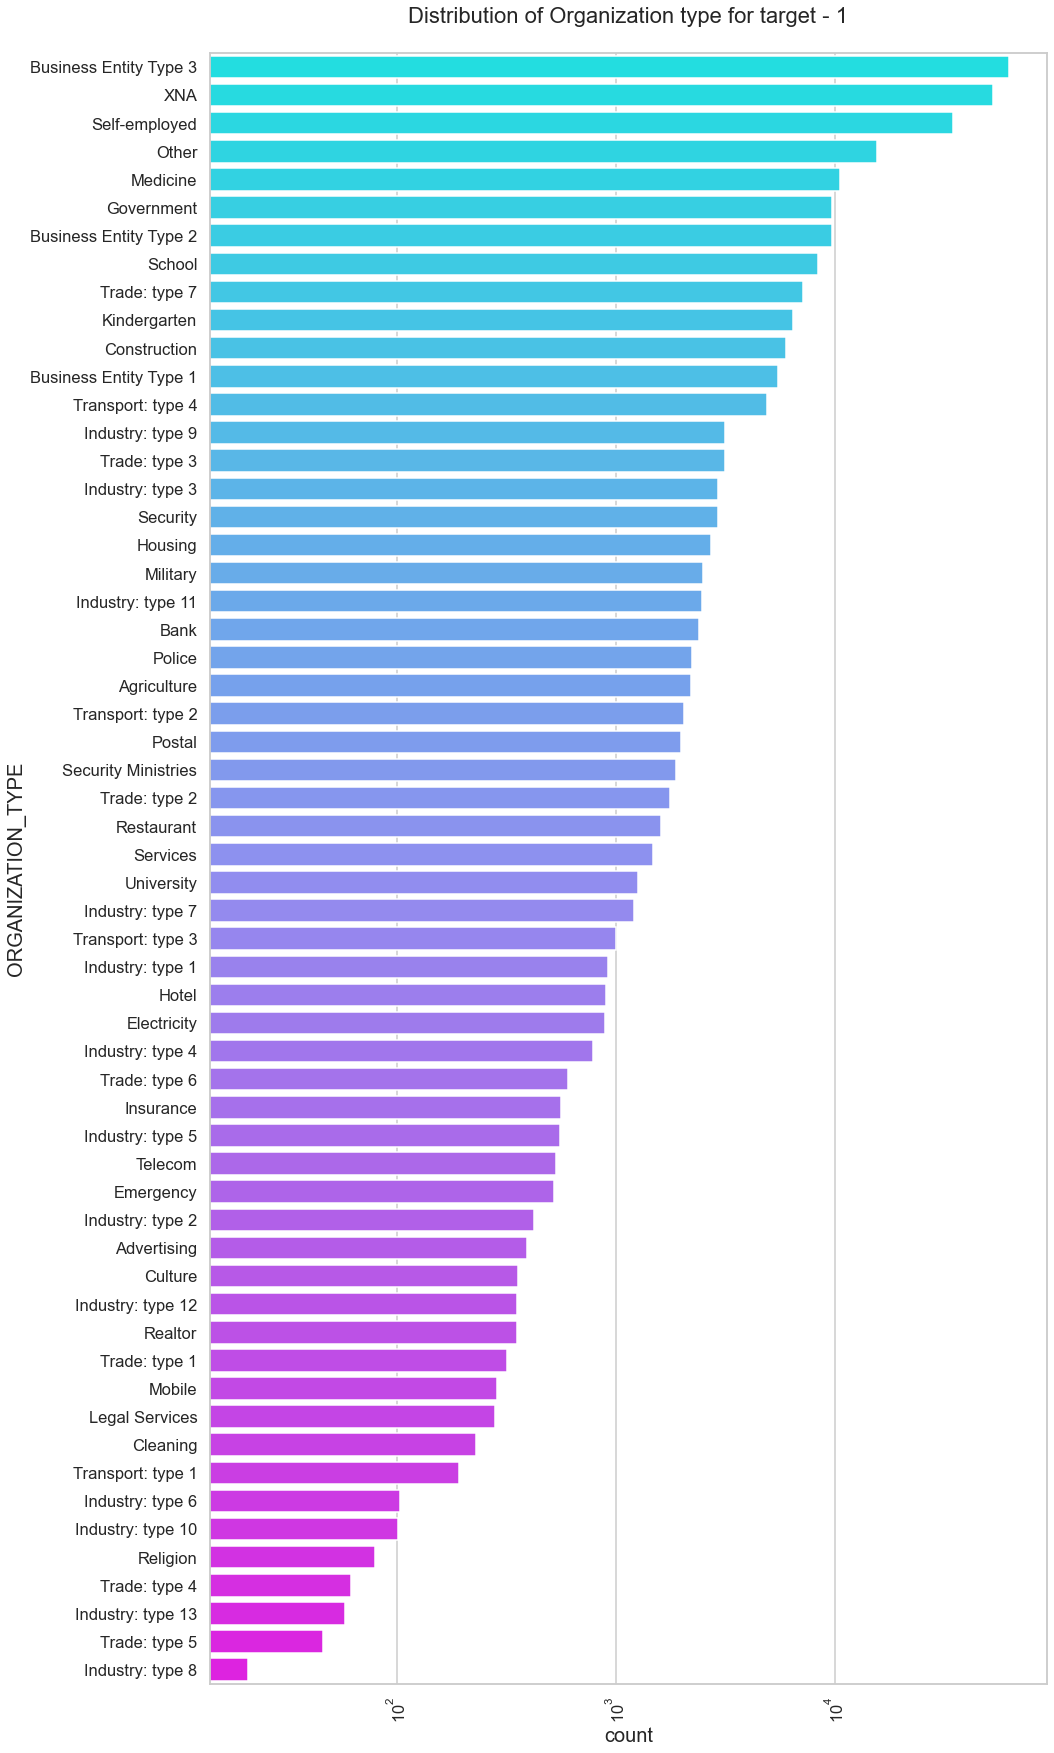

In [30]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

#### Inferences
1. Majority of the customers having difficulty in paying installments belong to the organization type ‘Business entity Type 3’, ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. The distribution results in the customers having difficulty in paying installments is similar to the results of distribution trends in the complete dataset.

#### Correlations between customers having difficulties in paying installments and customers that don't.

In [31]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [32]:
#Correlations for target0
target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.038308    0.002315   
AMT_INCOME_TOTAL                 0.038308          1.000000    0.416017   
AMT_CREDIT                       0.002315          0.416017    1.000000   
AMT_ANNUITY                      0.024767          0.485699    0.831900   
REGION_POPULATION_RELATIVE      -0.025551          0.097772    0.053570   
DAYS_BIRTH                       0.375639          0.093515   -0.057151   
DAYS_EMPLOYED                   -0.161230         -0.174540   -0.120400   
DAYS_REGISTRATION                0.180517          0.076387    0.009416   
DAYS_ID_PUBLISH                 -0.019986          0.035931   -0.001982   
HOUR_APPR_PROCESS_START          0.001725          0.102384    0.051370   
REG_REGION_NOT_LIVE_REGION      -0.010738          0.078372    0.019093   
REG_REGION_NOT_WORK_REGION       0.015455          0.161441    0.045430   
LIVE_REGION_NOT_WORK_REGION      0.021523          0.148976    0.047740   
REG_CITY_NOT_LIVE_CITY           0.027788          0.020368   -0.026649   
REG_CITY_NOT_WORK_CITY           0.076212          0.040087   -0.012662   
LIVE_CITY_NOT_WORK_CITY          0.071585          0.040321    0.006972   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.024767                   -0.025551   
AMT_INCOME_TOTAL                0.485699                    0.097772   
AMT_CREDIT                      0.831900                    0.053570   
AMT_ANNUITY                     1.000000                    0.058591   
REGION_POPULATION_RELATIVE      0.058591                    1.000000   
DAYS_BIRTH                      0.011740                   -0.030730   
DAYS_EMPLOYED                  -0.129775                   -0.002577   
DAYS_REGISTRATION               0.037717                   -0.036684   
DAYS_ID_PUBLISH                 0.016569                   -0.010463   
HOUR_APPR_PROCESS_START         0.054189                    0.128237   
REG_REGION_NOT_LIVE_REGION      0.035823                   -0.019922   
REG_REGION_NOT_WORK_REGION      0.075783                    0.029206   
LIVE_REGION_NOT_WORK_REGION     0.073054                    0.051195   
REG_CITY_NOT_LIVE_CITY         -0.004963                   -0.045545   
REG_CITY_NOT_WORK_CITY          0.009717                   -0.029350   
LIVE_CITY_NOT_WORK_CITY         0.019451                   -0.005476   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.375639      -0.161230           0.180517   
AMT_INCOME_TOTAL               0.093515      -0.174540           0.076387   
AMT_CREDIT                    -0.057151      -0.120400           0.009416   
AMT_ANNUITY                    0.011740      -0.129775           0.037717   
REGION_POPULATION_RELATIVE    -0.030730      -0.002577          -0.036684   
DAYS_BIRTH                     1.000000      -0.234168           0.298130   
DAYS_EMPLOYED                 -0.234168       1.000000          -0.037302   
DAYS_REGISTRATION              0.298130      -0.037302           1.000000   
DAYS_ID_PUBLISH                0.261979      -0.117617           0.094153   
HOUR_APPR_PROCESS_START        0.098444      -0.049101          -0.008471   
REG_REGION_NOT_LIVE_REGION     0.066377       0.021749           0.025938   
REG_REGION_NOT_WORK_REGION     0.096421      -0.010349           0.032723   
LIVE_REGION_NOT_WORK_REGION    0.070065      -0.019504           0.024163   
REG_CITY_NOT_LIVE_CITY         0.180952       0.022427           0.055307   
REG_CITY_NOT_WORK_CITY         0.239113      -0.083228           0.085865   
LIVE_CITY_NOT_WORK_CITY        0.156588      -0.098678           0.062442   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.019986                 0.001725   
AMT_INCOME_TOTAL                    0.035931                 0.102384   

In [33]:
#Correlation for target1
target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.004749    0.000200   
AMT_INCOME_TOTAL                -0.004749          1.000000    0.359276   
AMT_CREDIT                       0.000200          0.359276    1.000000   
AMT_ANNUITY                      0.033679          0.431617    0.811443   
REGION_POPULATION_RELATIVE      -0.031628          0.051463    0.039919   
DAYS_BIRTH                       0.267862         -0.007238   -0.155216   
DAYS_EMPLOYED                   -0.116332         -0.117761   -0.083601   
DAYS_REGISTRATION                0.133658          0.036671   -0.017099   
DAYS_ID_PUBLISH                 -0.027320         -0.005929   -0.053780   
HOUR_APPR_PROCESS_START         -0.022469          0.088174    0.028537   
REG_REGION_NOT_LIVE_REGION      -0.025824          0.076449    0.014192   
REG_REGION_NOT_WORK_REGION      -0.019571          0.156053    0.030331   
LIVE_REGION_NOT_WORK_REGION     -0.009823          0.144970    0.032564   
REG_CITY_NOT_LIVE_CITY           0.004127          0.008996   -0.028544   
REG_CITY_NOT_WORK_CITY           0.047486          0.027994   -0.029571   
LIVE_CITY_NOT_WORK_CITY          0.051352          0.030864   -0.011182   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.033679                   -0.031628   
AMT_INCOME_TOTAL                0.431617                    0.051463   
AMT_CREDIT                      0.811443                    0.039919   
AMT_ANNUITY                     1.000000                    0.023297   
REGION_POPULATION_RELATIVE      0.023297                    1.000000   
DAYS_BIRTH                     -0.030483                   -0.046398   
DAYS_EMPLOYED                  -0.096587                   -0.003635   
DAYS_REGISTRATION               0.035900                   -0.034315   
DAYS_ID_PUBLISH                -0.014472                   -0.023668   
HOUR_APPR_PROCESS_START         0.032083                    0.105989   
REG_REGION_NOT_LIVE_REGION      0.030930                   -0.032472   
REG_REGION_NOT_WORK_REGION      0.063880                   -0.009009   
LIVE_REGION_NOT_WORK_REGION     0.062370                    0.010621   
REG_CITY_NOT_LIVE_CITY         -0.002849                   -0.057083   
REG_CITY_NOT_WORK_CITY          0.007397                   -0.044331   
LIVE_CITY_NOT_WORK_CITY         0.014922                   -0.016447   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.267862      -0.116332           0.133658   
AMT_INCOME_TOTAL              -0.007238      -0.117761           0.036671   
AMT_CREDIT                    -0.155216      -0.083601          -0.017099   
AMT_ANNUITY                   -0.030483      -0.096587           0.035900   
REGION_POPULATION_RELATIVE    -0.046398      -0.003635          -0.034315   
DAYS_BIRTH                     1.000000      -0.107174           0.232940   
DAYS_EMPLOYED                 -0.107174       1.000000          -0.017716   
DAYS_REGISTRATION              0.232940      -0.017716           1.000000   
DAYS_ID_PUBLISH                0.251626      -0.049799           0.095750   
HOUR_APPR_PROCESS_START        0.065810      -0.027246          -0.032019   
REG_REGION_NOT_LIVE_REGION     0.055835       0.037032           0.015237   
REG_REGION_NOT_WORK_REGION     0.064540       0.016830           0.014323   
LIVE_REGION_NOT_WORK_REGION    0.039911       0.002150           0.010359   
REG_CITY_NOT_LIVE_CITY         0.165372       0.046567           0.033891   
REG_CITY_NOT_WORK_CITY         0.203415      -0.025656           0.071324   
LIVE_CITY_NOT_WORK_CITY        0.108966      -0.055327           0.052747   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.027320                -0.022469   
AMT_INCOME_TOTAL                   -0.005929                 0.088174   

#### Correlation heatmap to depict Correlation for customers that don't have any payment difficulties

In [34]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice

    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

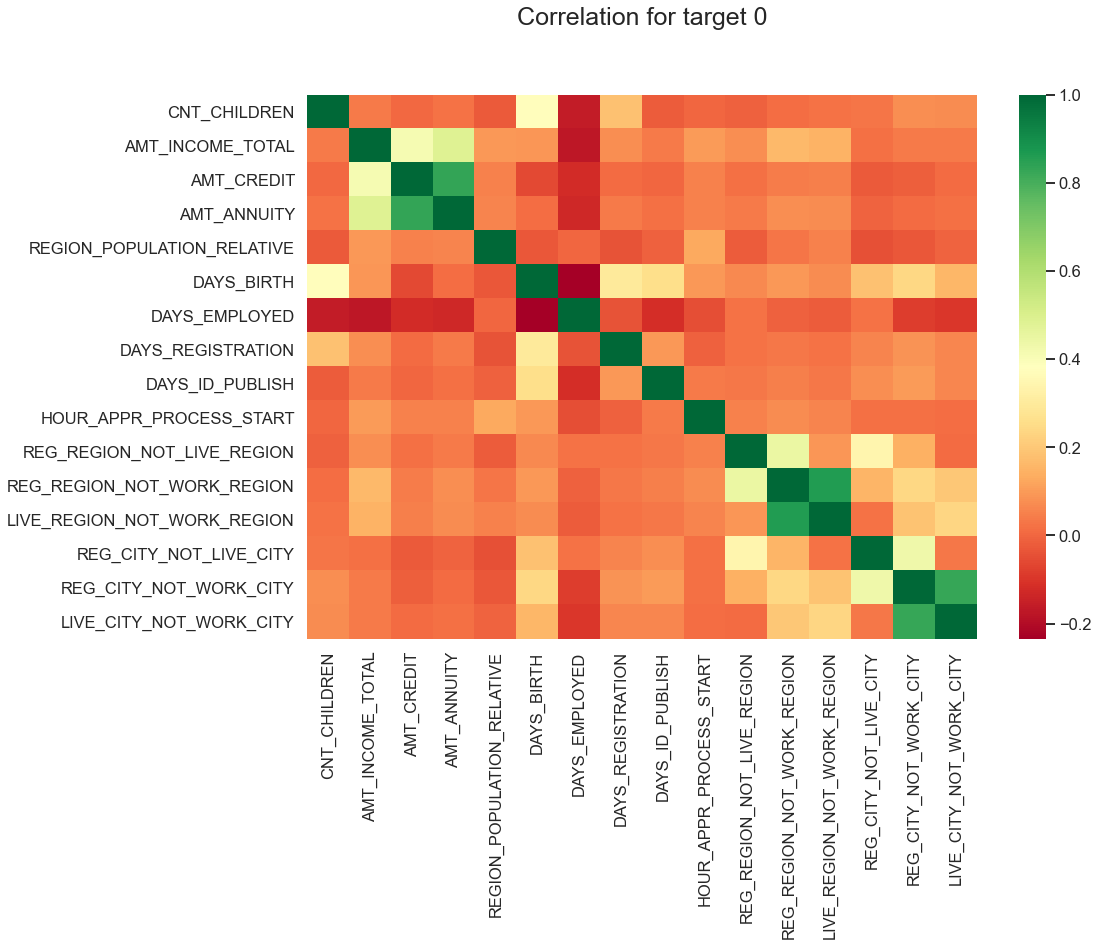

In [35]:
# For Target 0
targets_corr(data=target0,title='Correlation for target 0')

#### Inferences
1. Credit amount is inversely correlated to the date of birth, which means Credit amount is higher for younger people than older people. This is likely to imply that Older people tend to apply for loans for a larger amount than young people do.
2. Customers from a densely populated area have applied for a higher loan amount.

#### Correlation heatmap to depict Correlation for customers have payment difficulties

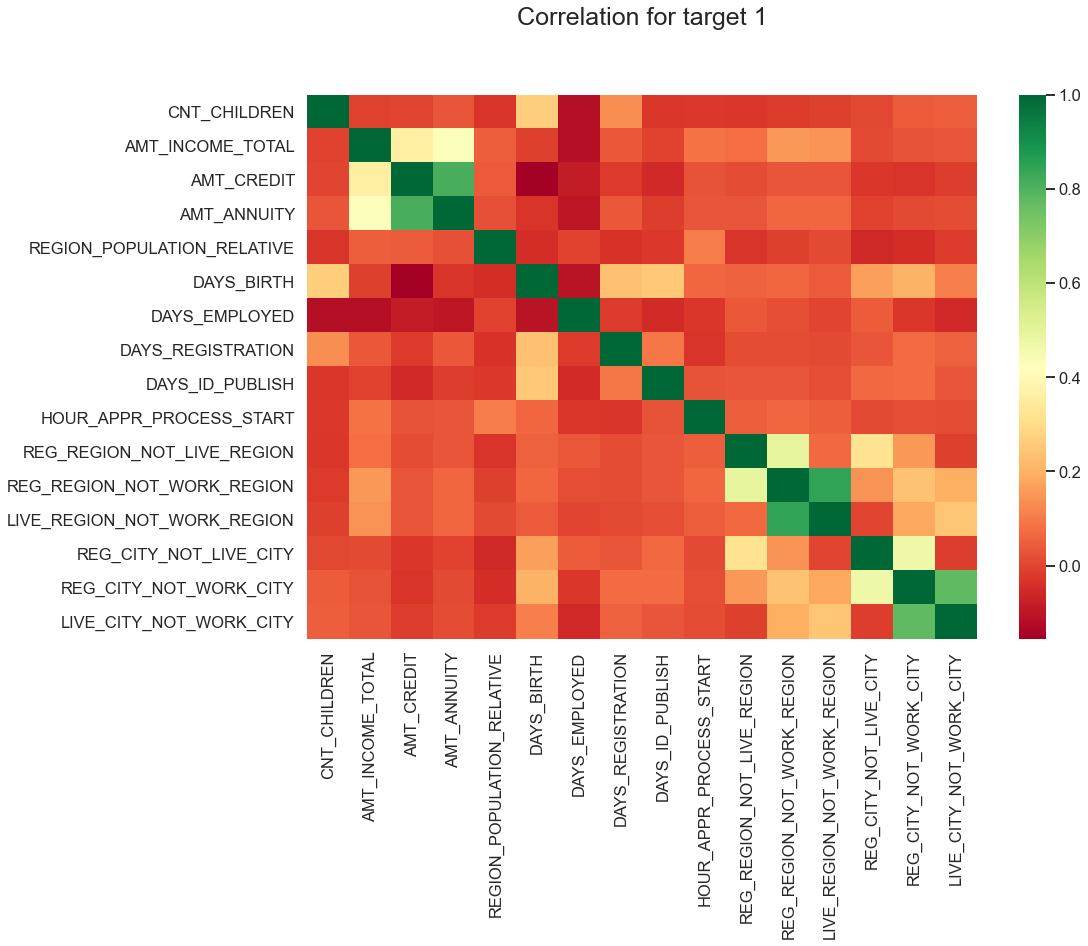

In [36]:
# For Target 1
targets_corr(data=target1,title='Correlation for target 1')

#### Inferences
1. Age has a very strong correlation with the Credit amount, as established in the previous heatmap.

#### Univariate analysis with Boxplots

In [37]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =appData, y=col,orient='v')
    plt.show()

#### Distribution of credit amount

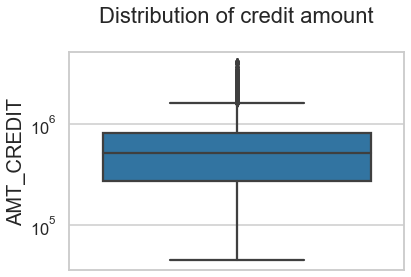

In [38]:
# Disrtibution of credit amount

univariate_numerical(data=appData,col='AMT_CREDIT',title='Distribution of credit amount')

#### Inferences
1. Some outliers are noticed in credit amount values.
2. The first quartile is bigger than third quartile for credit amount which means most of the Credit amount values are present in the first quartile.

#### Distribution of income amount

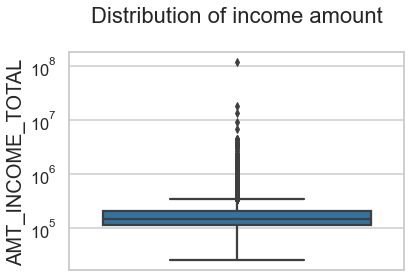

In [39]:
# Distribution of income amount

univariate_numerical(data=appData,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Inferences
1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.

#### Distribution of Credit Amount

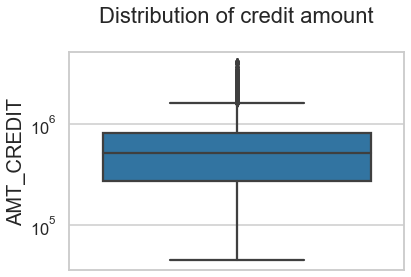

In [40]:
# Distribution of credit amount

univariate_numerical(data=appData,col='AMT_CREDIT',title='Distribution of credit amount')

#### Inferences
1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the Credit amount values received by the Customers are present in the first quartile.

# Bivariate analysis for numerical variables

### For Target 0

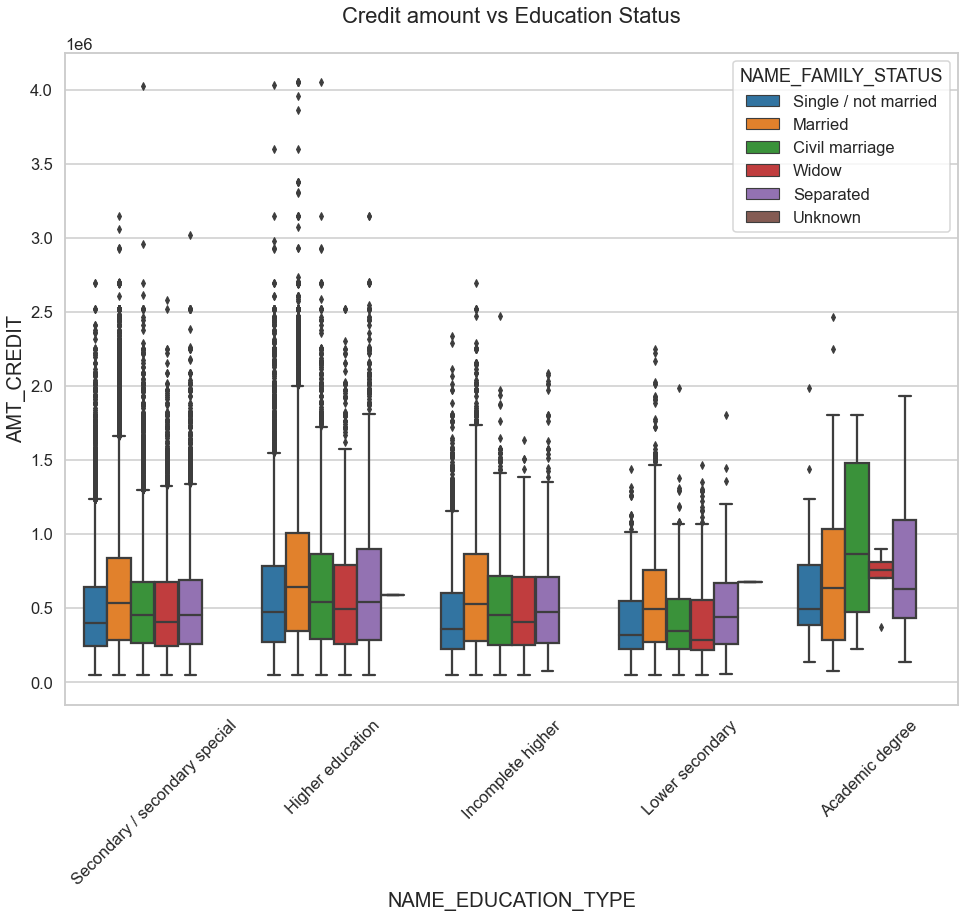

In [41]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =appData, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Inferences
1. From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education have applied for higher loan amounts.
2. Customers data with higher education having family status of 'marriage', 'single' or 'civil marriage' are having more outliers. 
3. Customers with Family status as 'Civil marriage' with education type as 'Academic degree' have more number of applications the third quartile.

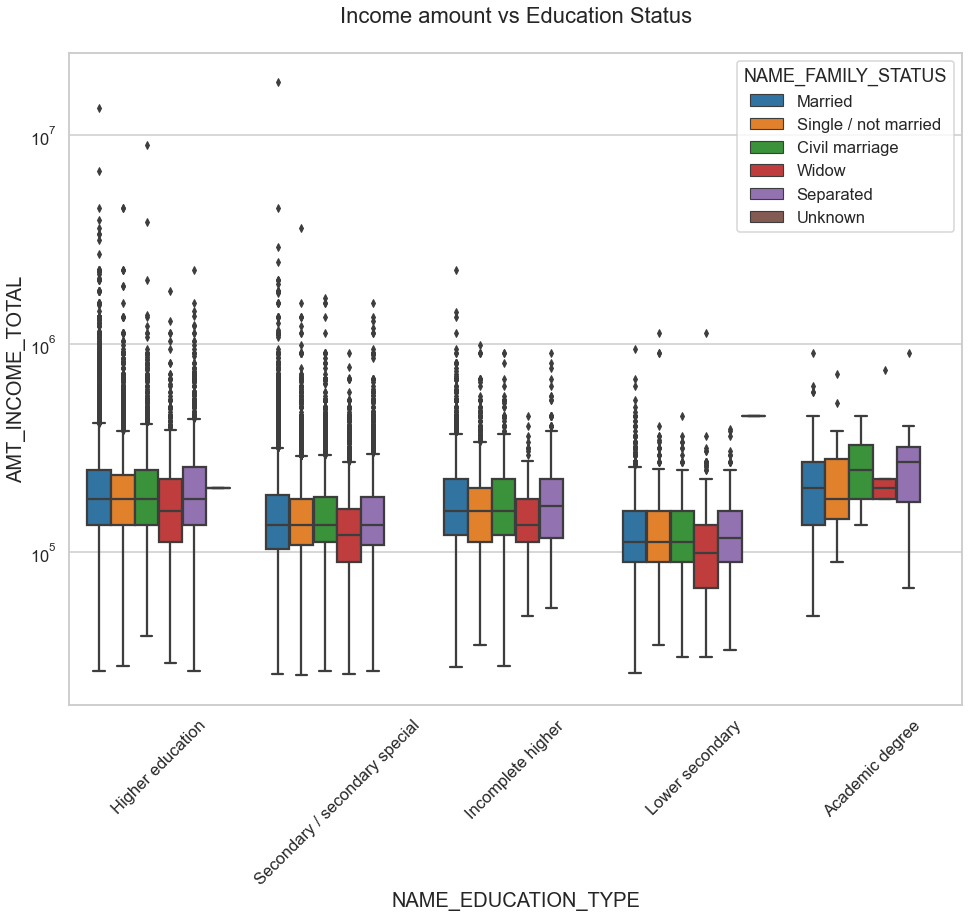

In [42]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Inferences
1. Customers with 'Higher education' the income amount is mostly equal irrespective of family status.
2. Customers with education type as 'Lower secondary' having 'civil marriage' family status have lesser income than other categories.

### For Target 1

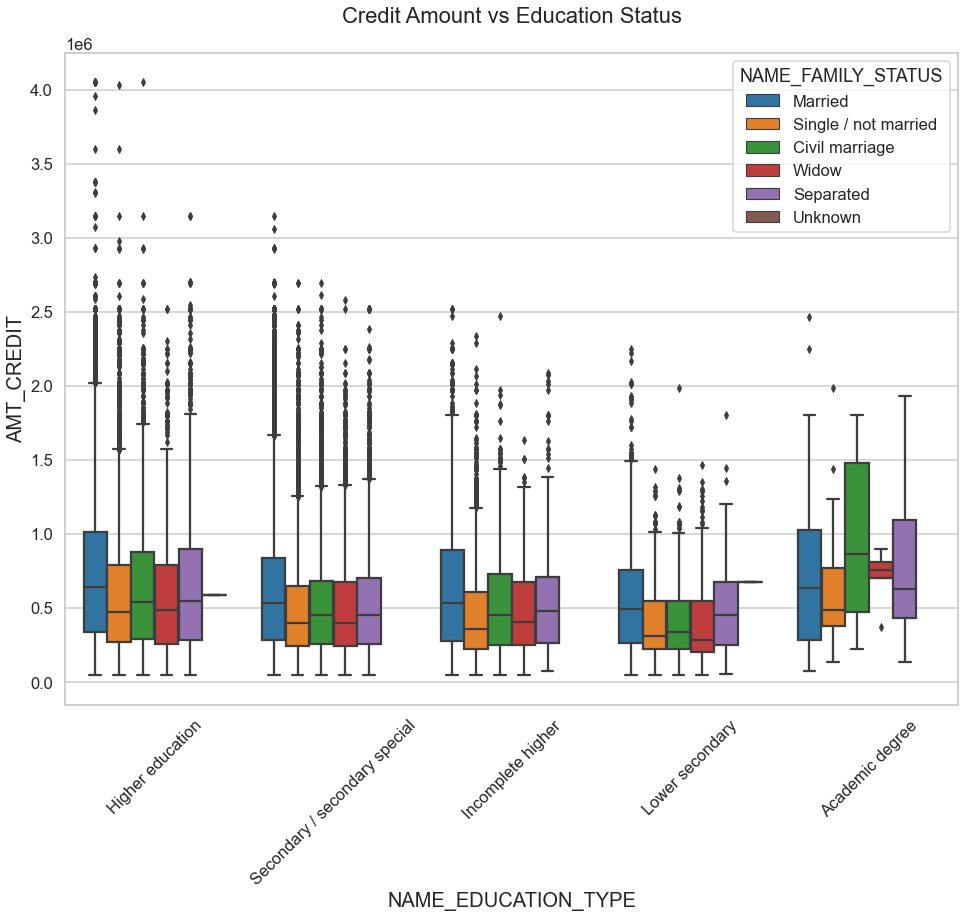

In [43]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### Inferences
1. Results for Target-1 customers are similar to results of Target-0 customers
2. From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education have applied for higher loan amounts.
3. Customers data with higher education having family status of 'marriage', 'single' or 'civil marriage' are having more outliers.
4. Customers with Family status as 'Civil marriage' with education type as 'Academic degree' have more number of applications the third quartile.

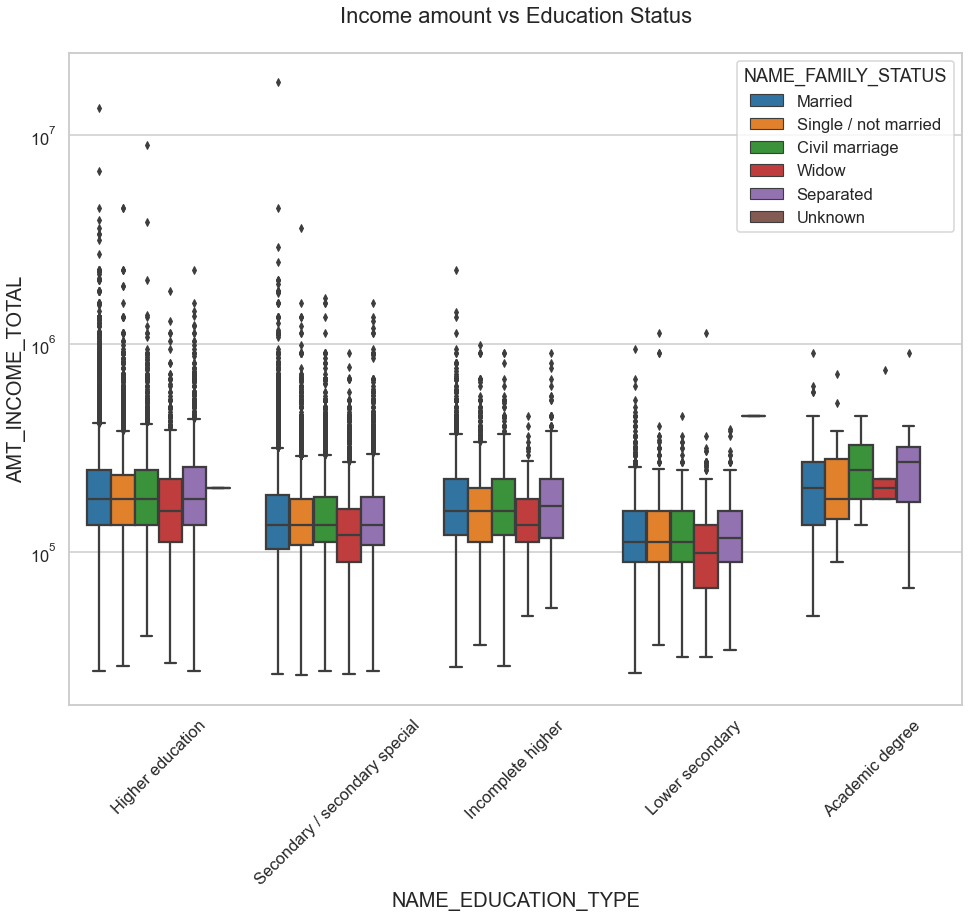

In [44]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Inferences
1. The results are similar to the results for Target-0.
2. Customers with 'Academic Degree' education have slightly higher income compared to those with other kinds of education. 
3. Customers with Lower secondary education have less income than others.

# Merge and Analyse Previous and Current application data

In [45]:
new_df=pd.merge(left=appData,right=prevData,how='inner',on='SK_ID_CURR',suffixes='_x')

In [46]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

## Univariate Analysis

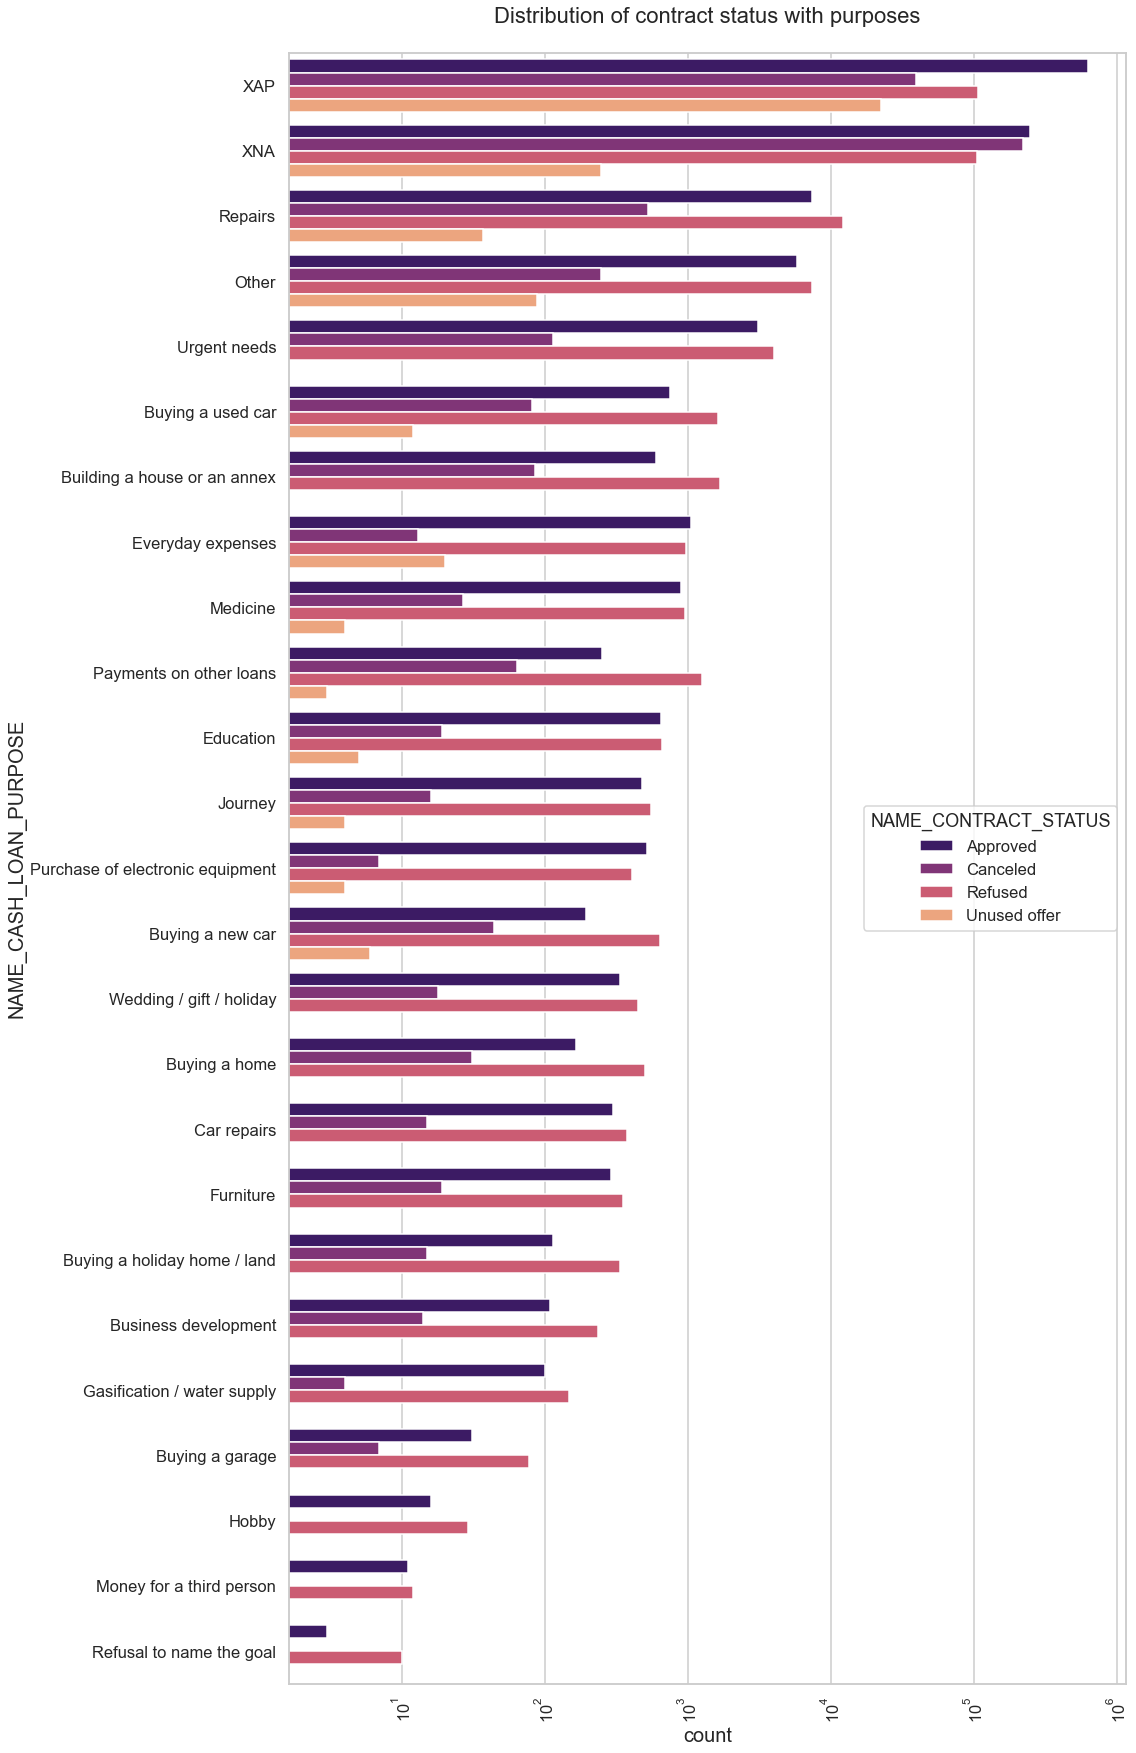

In [47]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

#### Inferences
1. Most loans applied for 'Repairs' have been rejected.
2. Almost equal number of loans applied for 'Education' have been approved and rejected.
3. Paying other loans and buying a new car is having significant higher rejection possibility than approval.

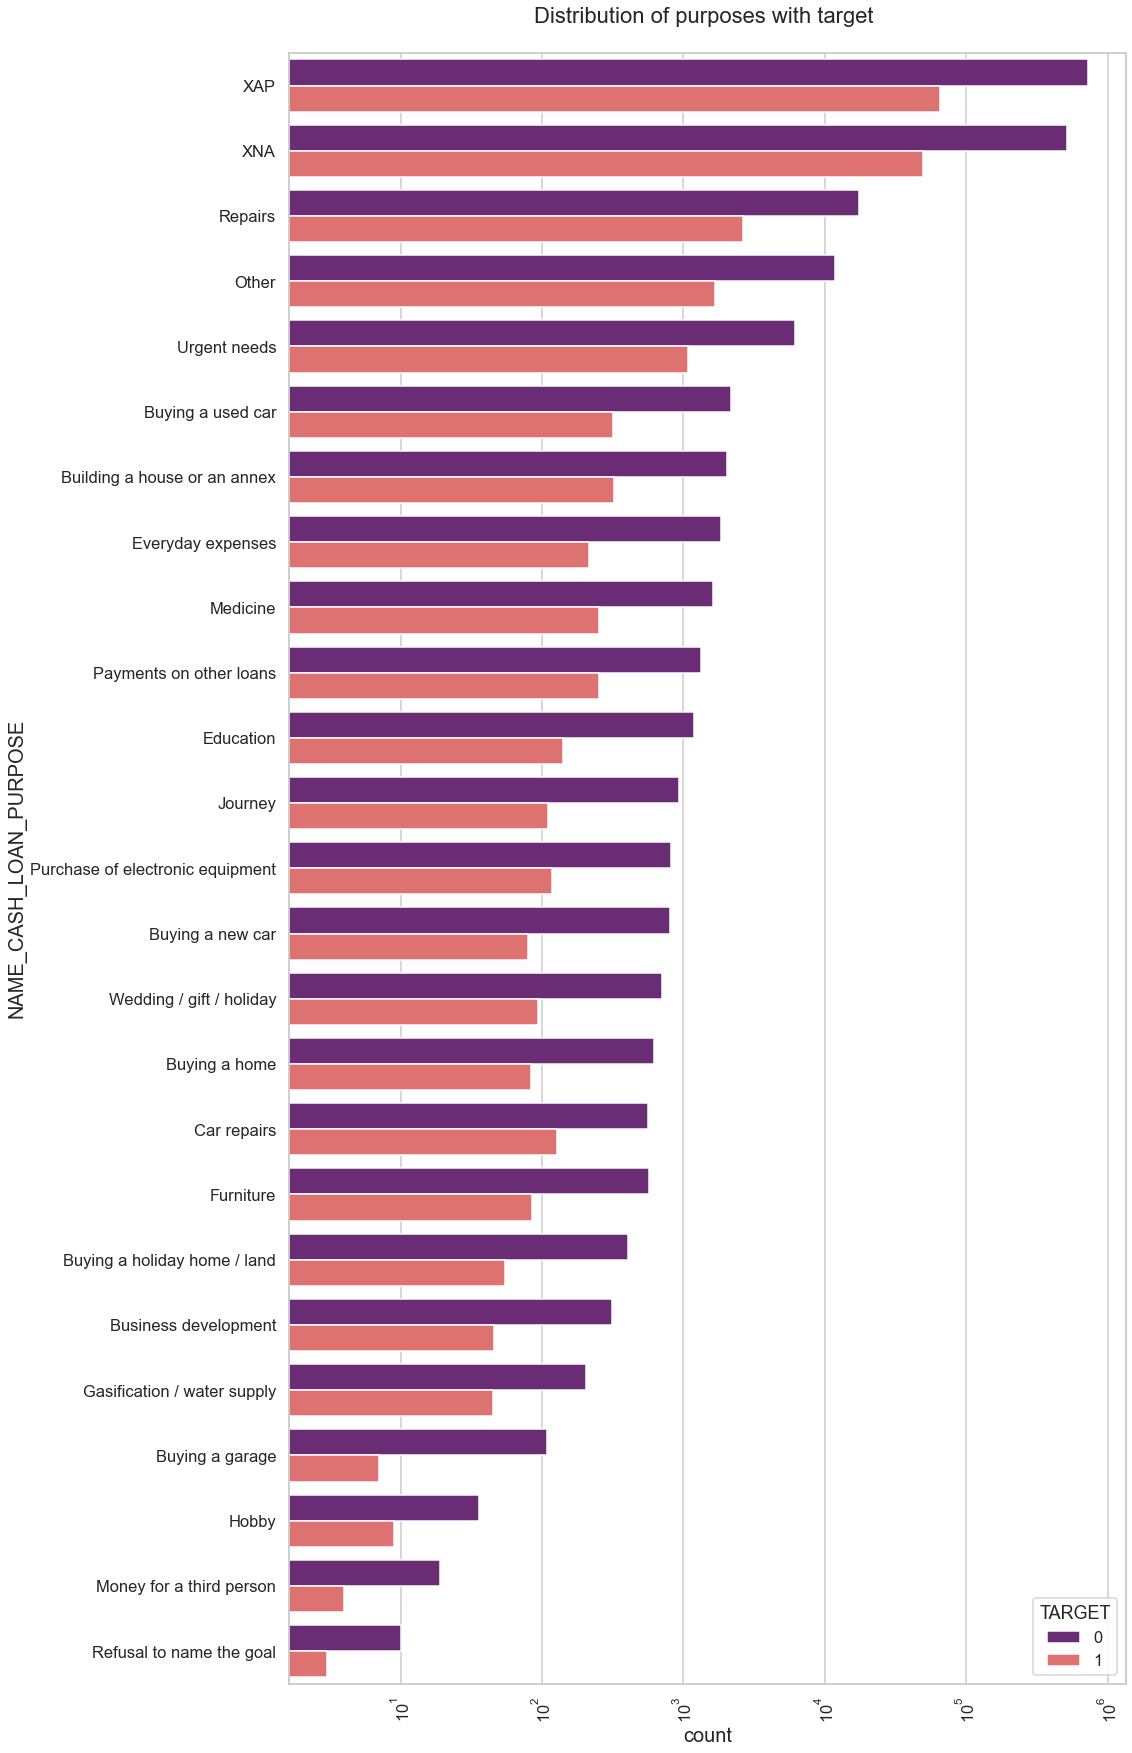

In [48]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

#### Inferences
1. Customers that applied for loan for'Repairs' purpose are facing most difficulites in payment on time.
2. Few other Loan purposes where the customers are facing difficulties in paying installments are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'. Hence we can focus on these categories to avoid difficulties.

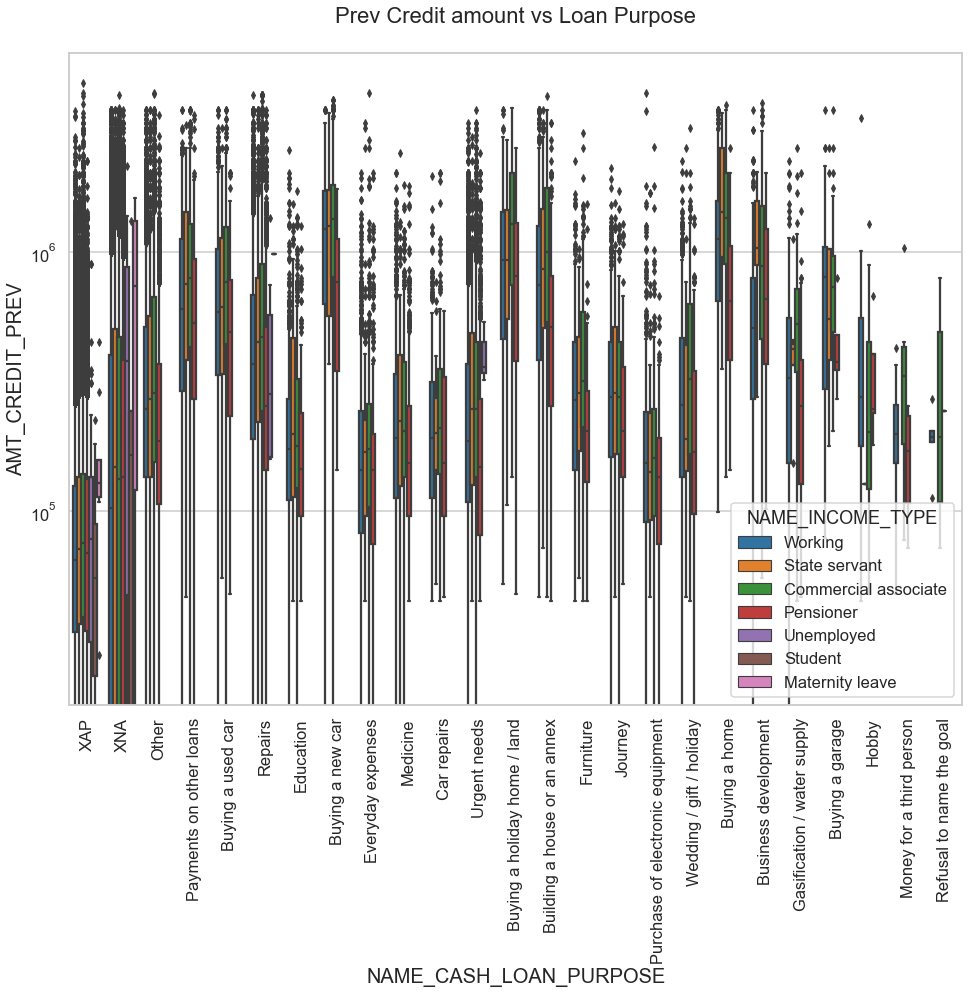

In [49]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### Inferences
1. The credit amount for Loan purposes 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. 
2. 'State Servants' have applied for higher Credit amounts.
3. Loans applied with reason 'Money for third person' or 'Hobby' have been applied for lower credit amounts.

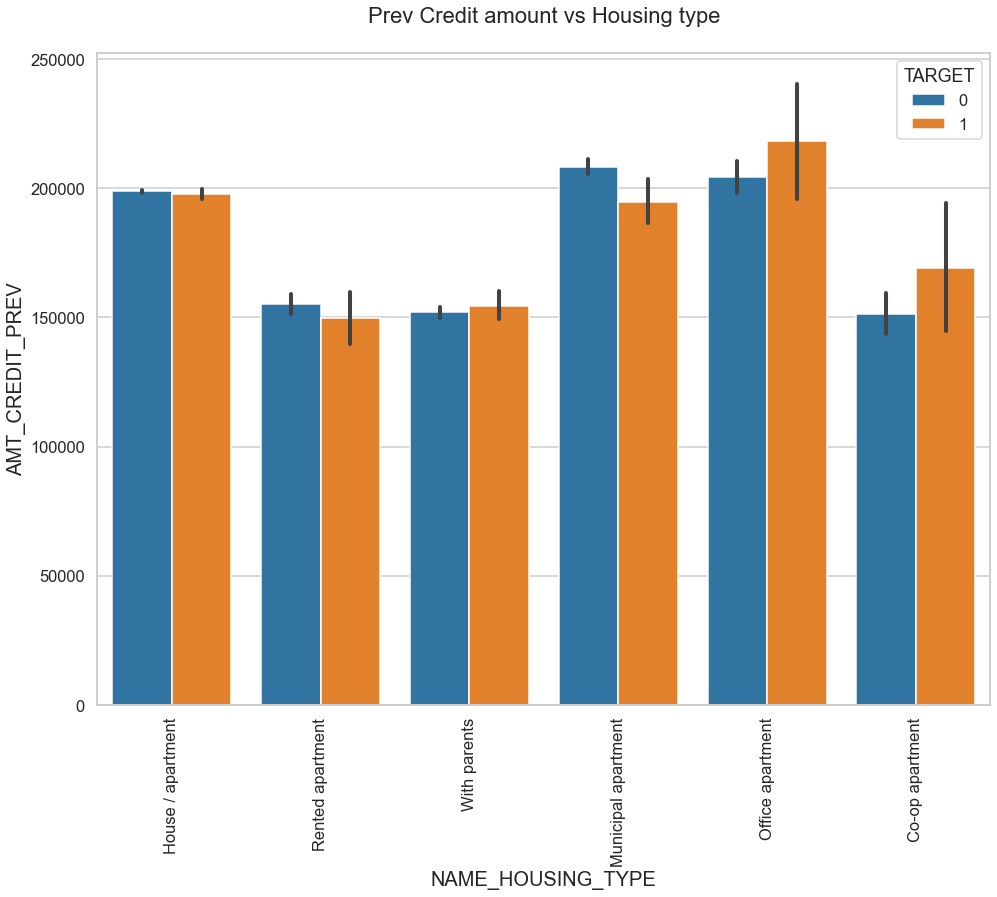

In [50]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### Inferences
1. Customers having 'Office apartment' have applied for higher credit and have slightly higher probability of having difficulties in paying installments.
2. Customers with a 'Co-op apartment' housing have a higher probability of having difficulties in payment of installments.
3. It can be concluded that the company can focus on customers with 'House/apartment' or 'Municipa apartment' types of housing to approve laons.

# Conclusions